In [2]:
from pandas import read_csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV,train_test_split , cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

About the data: 

### Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

> Sales -- Unit sales (in thousands) at each location

>Competitor Price -- Price charged by competitor at each location

>Income -- Community income level (in thousands of dollars)

>Advertising -- Local advertising budget for company at each location (in thousands of dollars)

>Population -- Population size in region (in thousands)

>Price -- Price company charges for car seats at each site

> Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

>Age -- Average age of the local population

>Education -- Education level at each location

>Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

>US -- A factor with levels No and Yes to indicate whether the store is in the US or not

### The company dataset looks like this: 
 
Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [3]:
df =  pd.read_csv("/content/Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
df.agg(["skew","kurt"])

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skew,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurt,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [9]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

Sales 
 7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64
CompPrice 
 121    16
122    14
131    14
123    13
115    12
       ..
94      1
161     1
97      1
88      1
85      1
Name: CompPrice, Length: 73, dtype: int64
Income 
 69     11
42     10
32      8
100     8
67      7
       ..
27      1
114     1
43      1
112     1
23      1
Name: Income, Length: 98, dtype: int64
Advertising 
 0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
4      12
15     12
16     11
8      11
14     11
9      10
2       9
19      8
1       8
6       7
17      6
18      6
20      4
23      2
22      2
24      1
25      1
26      1
29      1
21      1
Name: Advertising, dtype: int64
Population 
 276    4
148    4
237    4
170    4
220    4
      ..
216    1
492    1
356    1
416    1
368    1
Name: Population, Length: 275, dtype: int64
Price 
 120    12
128    12
107    10
1

In [10]:
for i in df.columns:
    print(i , "\n" , df[i].unique())

Sales 
 [ 9.5  11.22 10.06  7.4   4.15 10.81  6.63 11.85  6.54  4.69  9.01 11.96
  3.98 10.96 11.17  8.71  7.58 12.29 13.91  8.73  6.41 12.13  5.08  5.87
 10.14 14.9   8.33  5.27  2.99  7.81 13.55  8.25  6.2   8.77  2.67 11.07
  8.89  4.95  6.59  3.24  2.07  7.96 10.43  4.12  4.16  4.56 12.44  4.38
  3.91 10.61  1.42  4.42  7.91  6.92  4.9   6.85 11.91  0.91  5.42  5.21
  8.32  7.32  1.82  8.47  7.8   8.85 13.39  7.99  9.46  6.5   5.52 12.61
  8.55 10.64  7.7   4.43  9.14  8.01  7.52 11.62  2.23  8.7  11.7   6.56
  7.95  5.33  4.81  4.53  8.86  8.39  5.58  9.48  7.45 12.49  4.88  4.11
  5.3   5.07  4.62  5.55  0.16  3.47  8.98  9.    6.62  6.67  6.01  9.31
  8.54  8.8   7.57  7.37  6.87 11.67  6.88  8.19  8.87  9.34 11.27  6.52
  4.96  4.47  8.41  9.54  7.62  3.67  6.44  5.17 10.27 12.3   6.03  6.53
  7.44  0.53  9.09  3.9  10.51  7.56 11.48 10.49 10.77  7.64  5.93  6.89
  7.71  7.49 10.21 12.53  9.32  4.67  2.93  3.63  5.68  8.22  0.37  6.71
  7.3   9.03  6.38  0.    7.54  5.61 10.48 

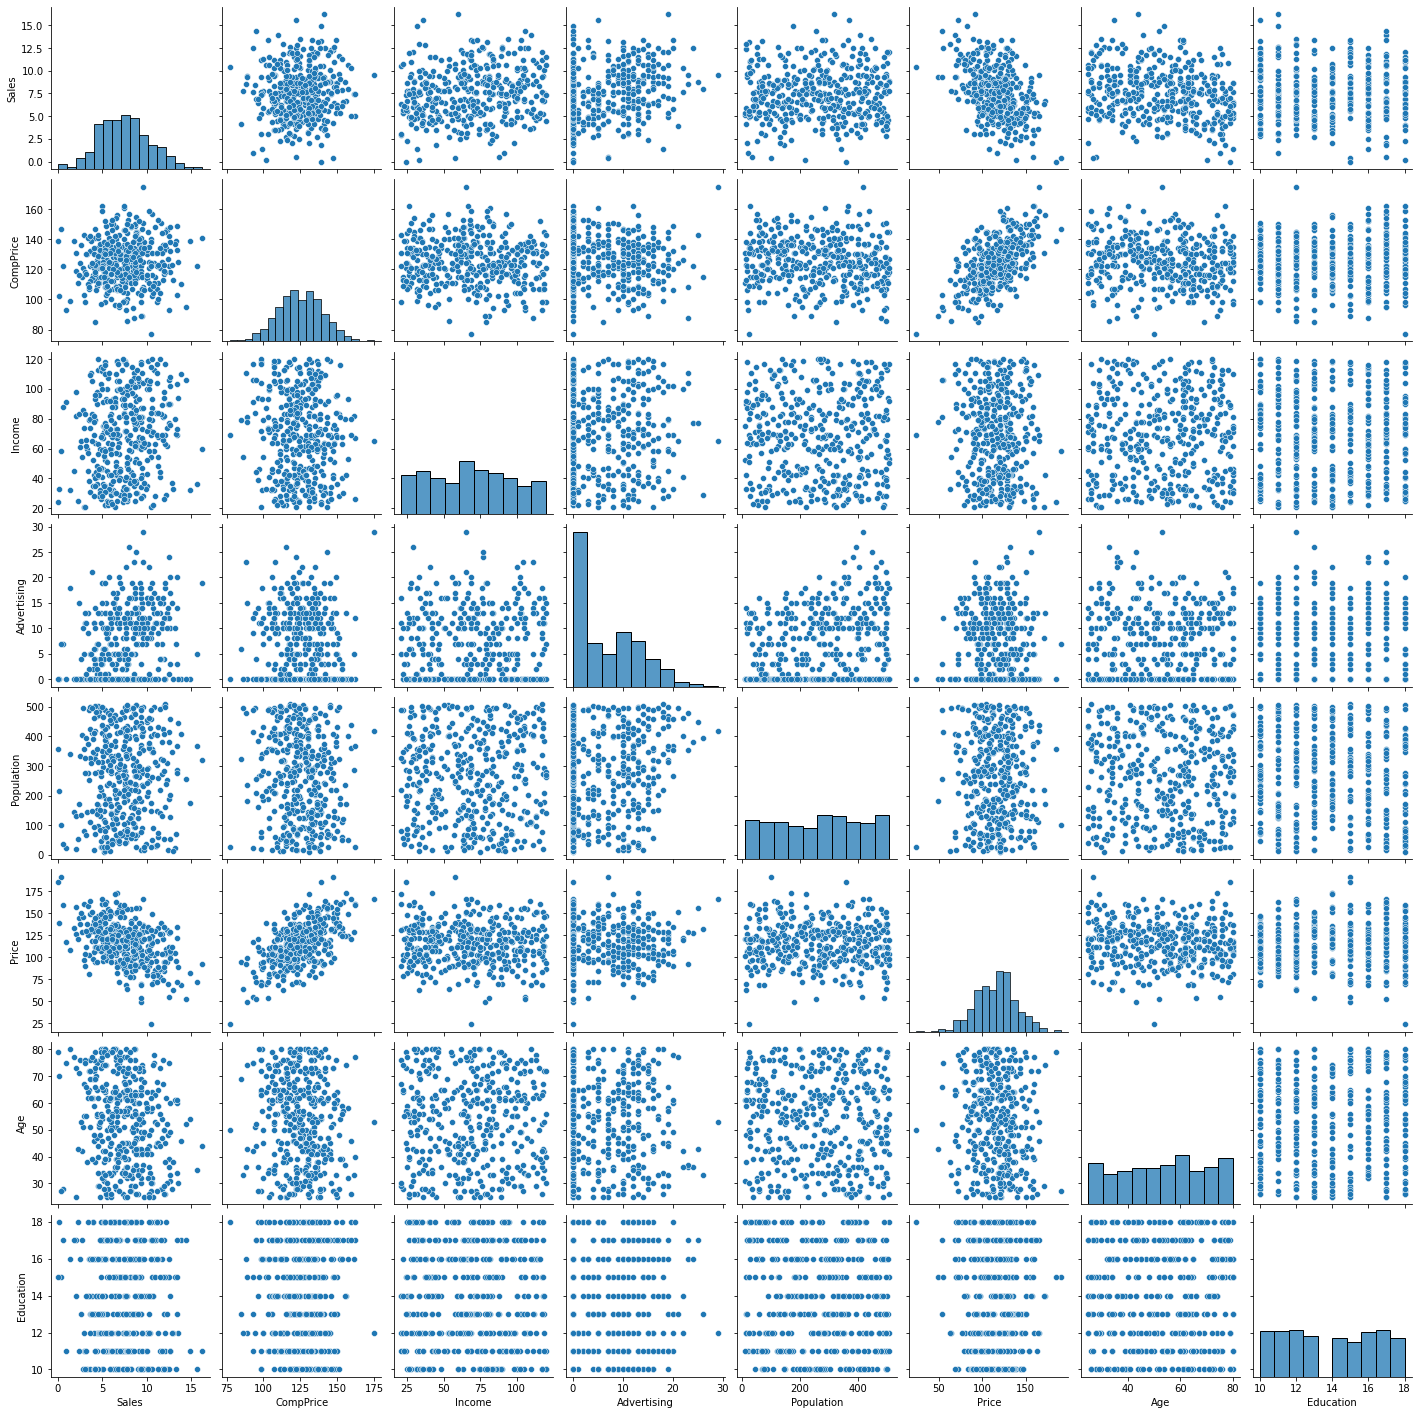

In [11]:
sns.pairplot(df)

In [12]:
df["Sales"].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [13]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 3 categorical variables

The categorical variables are :
 ['ShelveLoc', 'Urban', 'US']


There are 8 Numeric variables

The Numeric variables are :
 ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


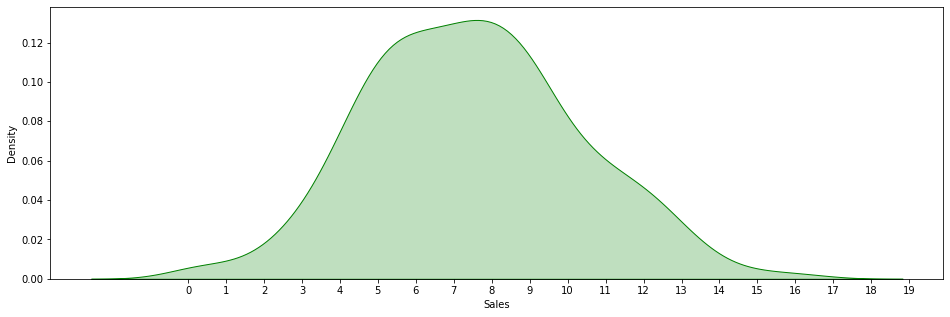

Skew: -0.04275457528359782
Kurtosis: 0.041666402841529226


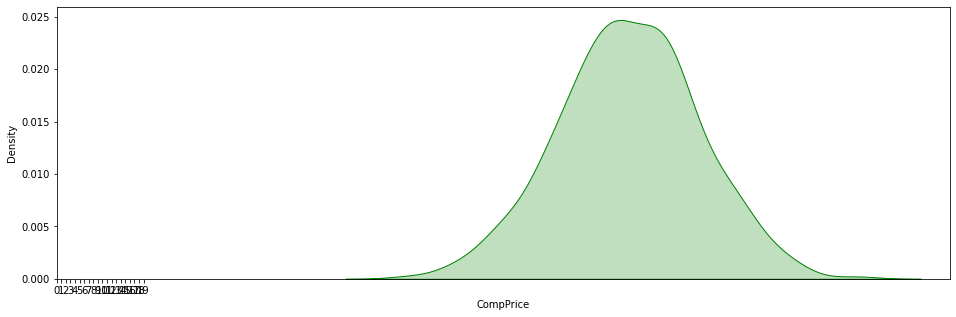

Skew: 0.04944448796161163
Kurtosis: -1.0852889894205275


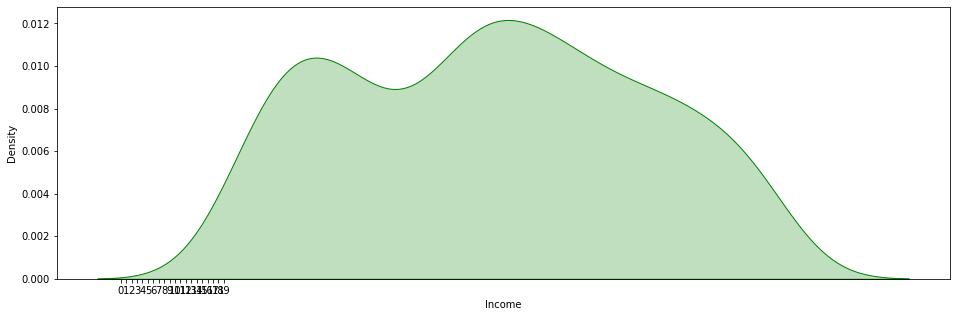

Skew: 0.6395857712012682
Kurtosis: -0.54511783750007


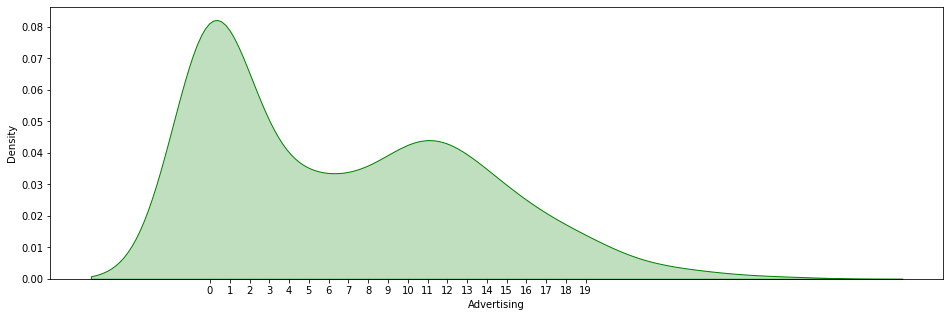

Skew: -0.05122663813815477
Kurtosis: -1.2023183469881713


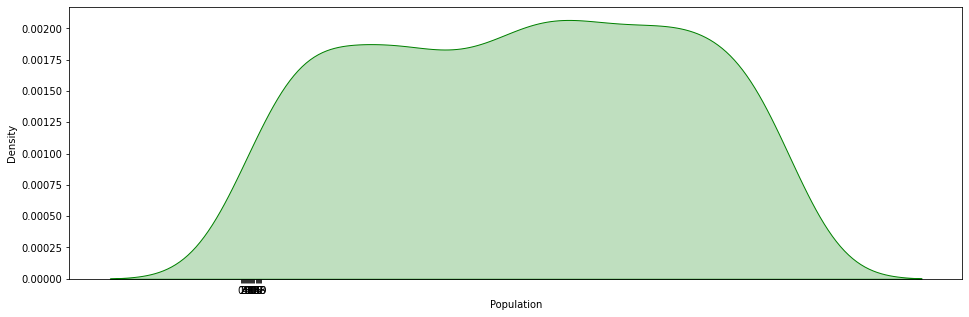

Skew: -0.12528619394494211
Kurtosis: 0.45188500467657766


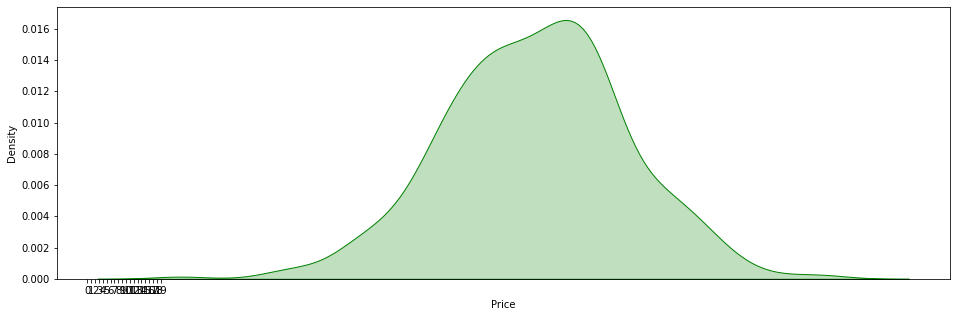

Skew: -0.07718173189535066
Kurtosis: -1.1343919819459476


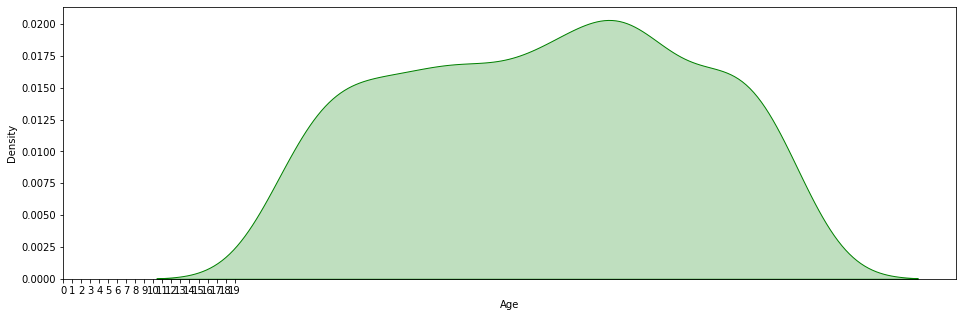

Skew: 0.044006827429473115
Kurtosis: -1.2983317016794282


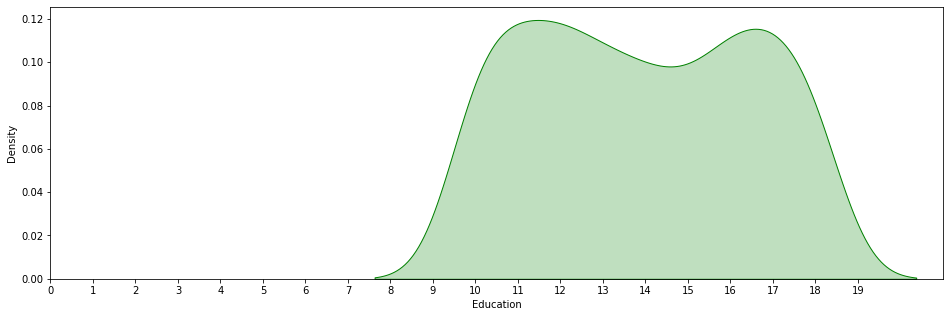

In [14]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(df[i].skew()))
  print("Kurtosis: {}".format(df[i].kurtosis()))
  ax = sns.kdeplot(df[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()

<Figure size 432x288 with 0 Axes>

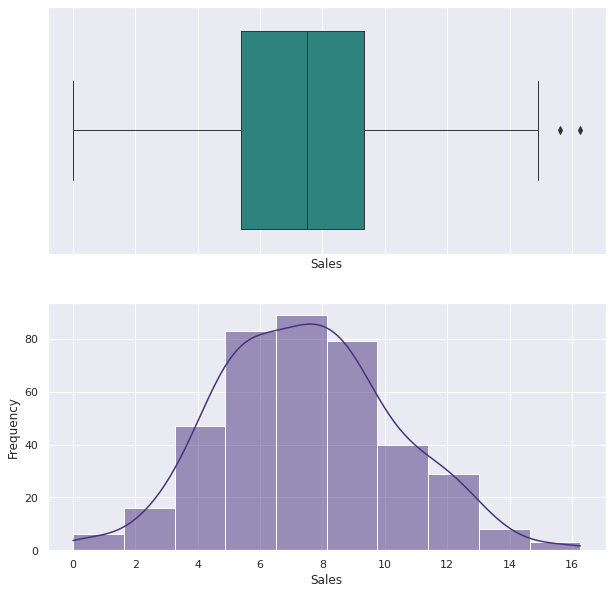

<Figure size 720x720 with 0 Axes>

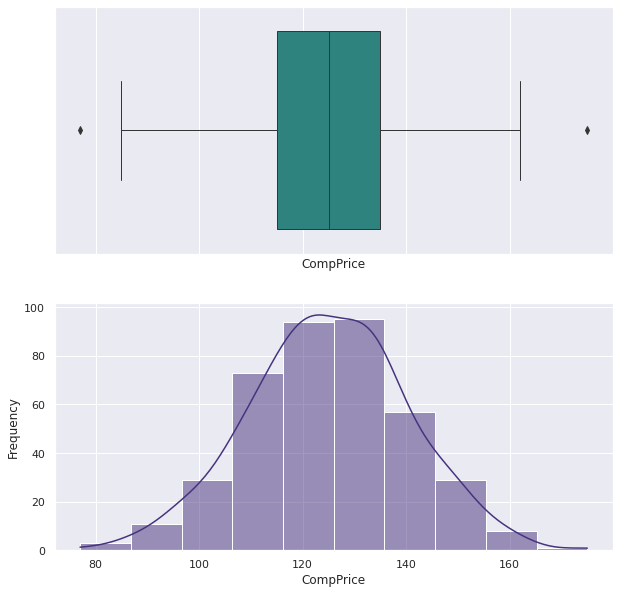

<Figure size 720x720 with 0 Axes>

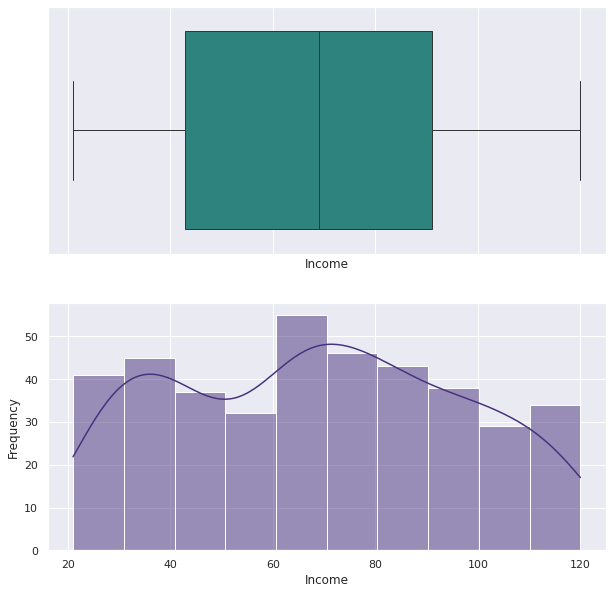

<Figure size 720x720 with 0 Axes>

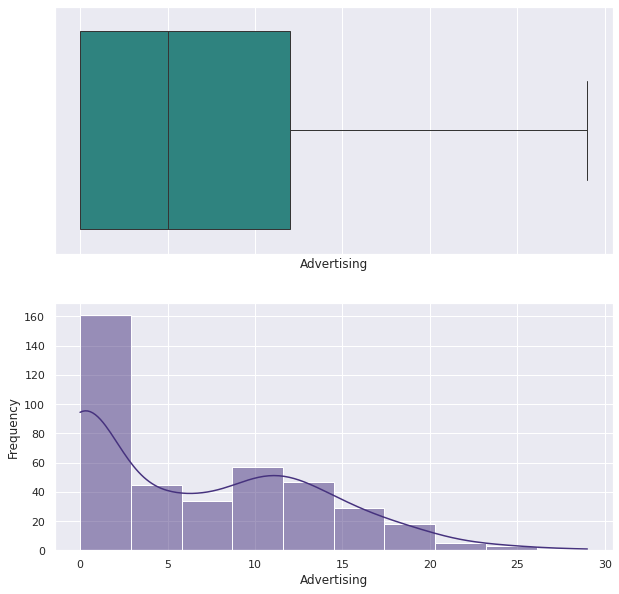

<Figure size 720x720 with 0 Axes>

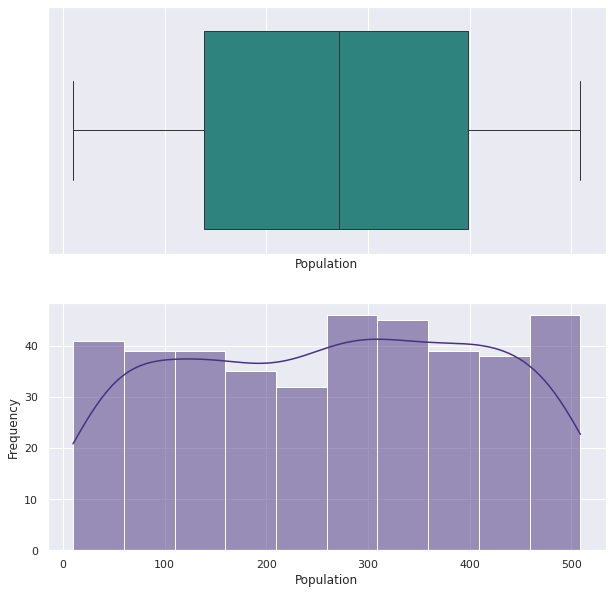

<Figure size 720x720 with 0 Axes>

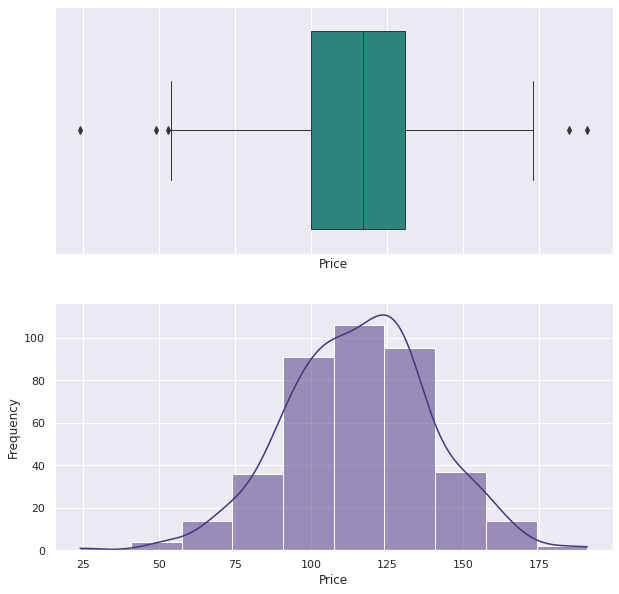

<Figure size 720x720 with 0 Axes>

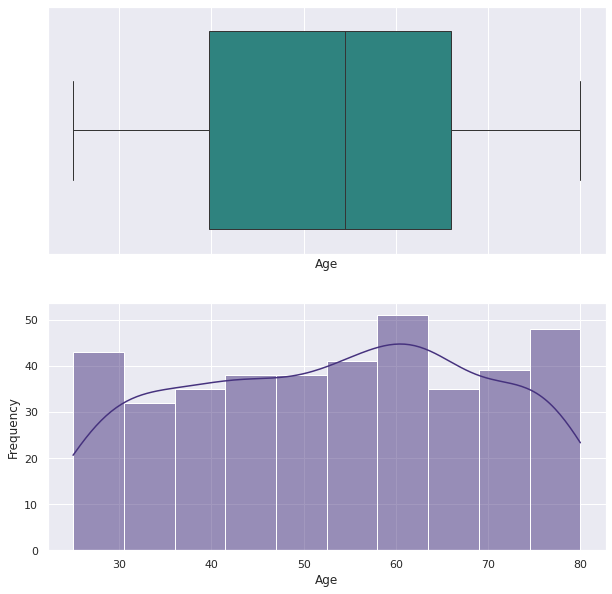

<Figure size 720x720 with 0 Axes>

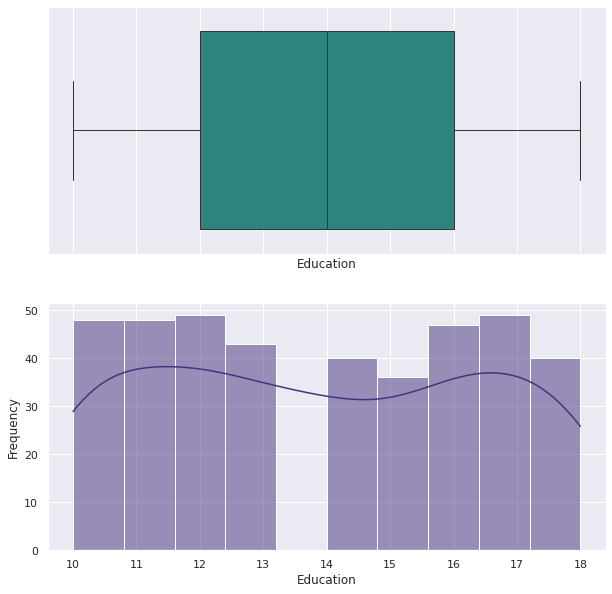

In [15]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="viridis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="viridis")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="viridis")

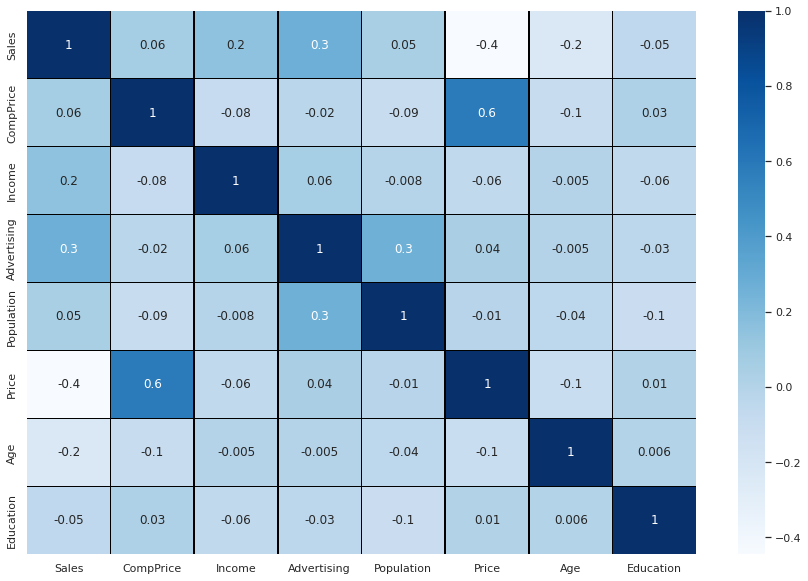

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues",linecolor='black', linewidths=0.5, fmt='.1g')

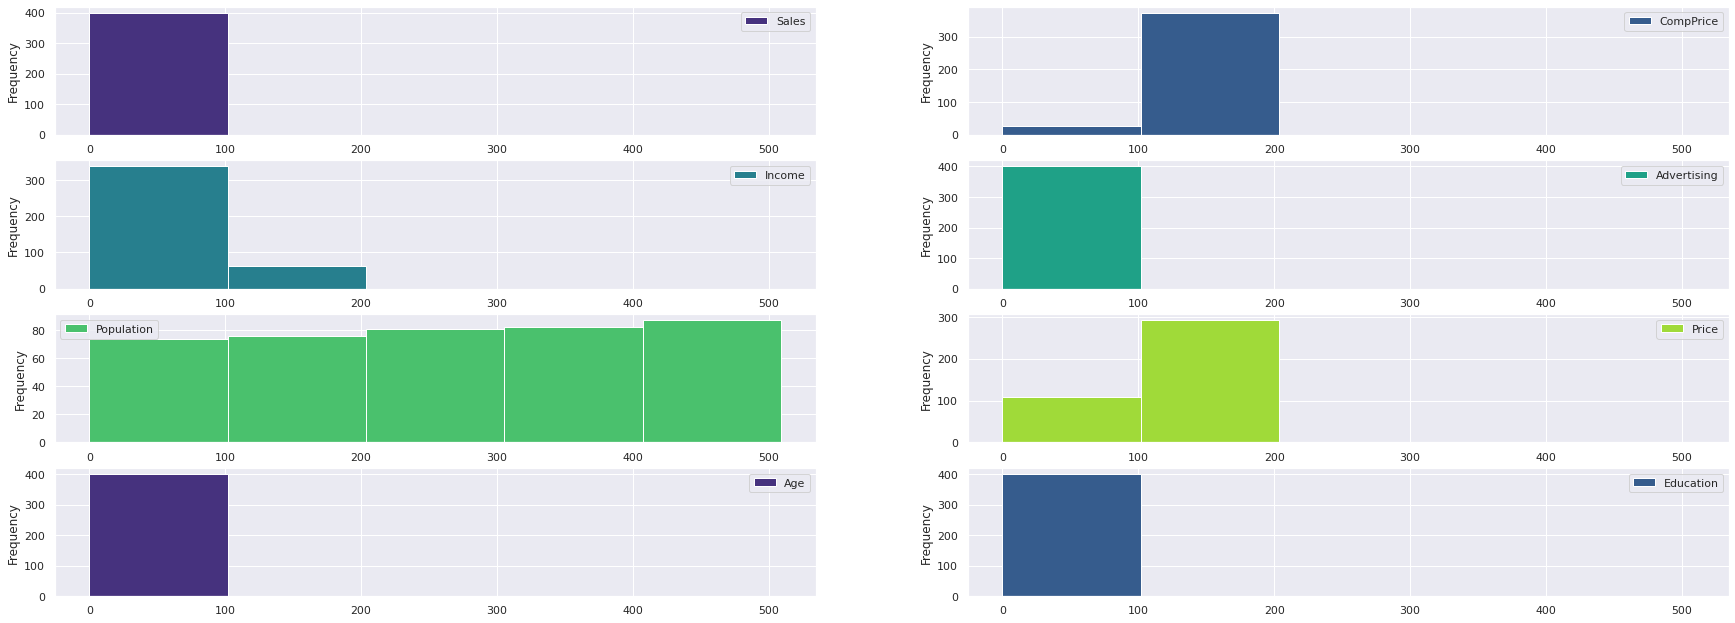

In [17]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=5, subplots=True, layout=(9,2), sharex=False, sharey=False)

plt.show()

In [18]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Encoding Variables:

In [19]:
data=df.copy()
data['US'] = data['US'].map({'Yes':1 ,'No':0})
data['Urban'] = data['Urban'].map({'Yes':1 ,'No':0})
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


### Feature Scalling:

In [20]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()

# data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns, index=data.index)
# data

In [21]:
# #Normalization Function:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data

array([[0.58389674, 0.62244898, 0.52525253, ..., 0.875     , 1.        ,
        1.        ],
       [0.68961278, 0.34693878, 0.27272727, ..., 0.        , 1.        ,
        1.        ],
       [0.61831592, 0.36734694, 0.14141414, ..., 0.25      , 1.        ,
        1.        ],
       ...,
       [0.45543946, 0.86734694, 0.05050505, ..., 1.        , 1.        ,
        1.        ],
       [0.36508912, 0.23469388, 0.58585859, ..., 0.25      , 1.        ,
        1.        ],
       [0.59680393, 0.58163265, 0.16161616, ..., 0.75      , 1.        ,
        1.        ]])

In [22]:
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)
scaled_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,0.0,0.145455,0.500,1.0,1.0
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,0.5,0.545455,0.125,0.0,1.0
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,0.5,0.272727,1.000,1.0,1.0
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,1.0,0.454545,0.250,1.0,1.0


In [23]:
x = scaled_data.iloc[:, 1:11]
y = scaled_data.iloc[:, 0]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.0,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.5,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.5,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,1.0,0.454545,0.250,1.0,1.0


## Spliting Data:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 10)
(120, 10)
(280,)
(120,)


## Model Building:

In [26]:
model = DecisionTreeRegressor(random_state = 42, max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [27]:
#Find the accuracy
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.7536
Test set score: 0.4202


> **The threshold with lowest sum of squared residual of tree becomes the root of the tree**

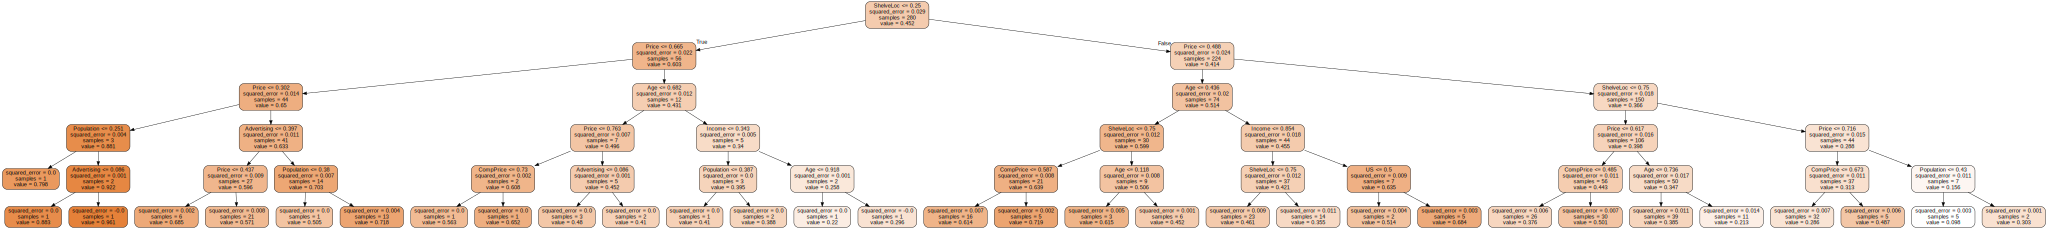

<Figure size 720x504 with 0 Axes>

In [28]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model, filled=True, rounded=True, feature_names=x.columns, out_file=None)
import graphviz
plt.figure(figsize = (10,7))
graphviz.Source(dot_data)

In [41]:
y_train.value_counts()

0.479410    4
0.409957    3
0.422864    3
0.553780    2
0.360787    2
           ..
0.394591    1
0.154886    1
0.618316    1
0.537185    1
0.772588    1
Name: Sales, Length: 249, dtype: int64

In [42]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

0.461051    17
0.385135    15
0.500676    14
0.285802    12
0.570990    10
0.375680     8
0.355475     7
0.717791     7
0.614129     5
0.685310     4
0.303319     4
0.451752     3
0.212941     3
0.683835     2
0.562999     2
0.220037     2
0.652120     1
0.486908     1
0.504610     1
0.883221     1
0.960664     1
dtype: int64

In [43]:
print('R^2_score:', metrics.r2_score(y_test,preds))

R^2_score: 0.42020569751393166


In [45]:
print('MAE:', metrics.mean_absolute_error(y_test,preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 0.10987631164376006
MSE: 0.018573010485951728
RMSE: 0.13628283268978425


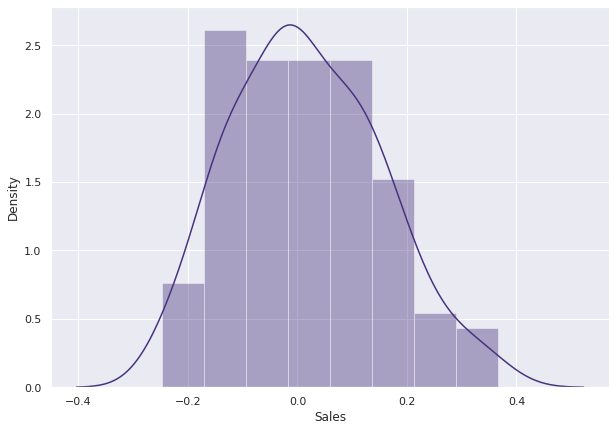

In [33]:
# checking difference between labled y and predicted y
plt.figure(figsize=(10,7))
sns.distplot(y_test-preds)


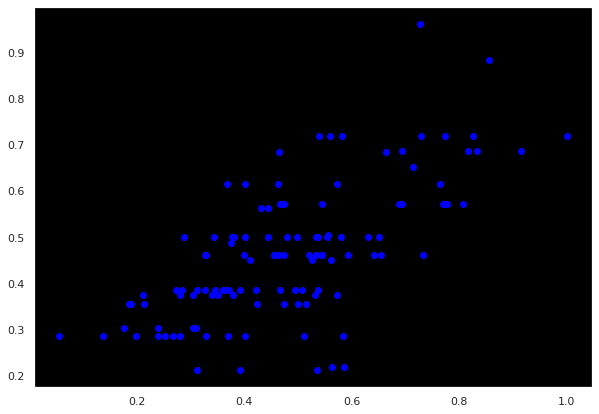

In [46]:
plt.figure(figsize=(10,7))
plt.axes(facecolor='black')
plt.scatter(y_test,preds, color = "blue")
plt.grid()
plt.show()

## Grid Search for model tunning:

In [47]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
tuning_model=GridSearchCV(model,param_grid=parameters,scoring='neg_mean_squared_error',verbose=3)
tuning_model.fit(x,y)

In [50]:
# best hyperparameters & best model score
print(tuning_model.best_params_, '\n','\n' ,  tuning_model.best_score_)

{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'} 
 
 -0.01776887651274863


In [60]:
print(f'\n\n To find max depth \n\n')
for i in range(2,20):
  entro_model = DecisionTreeRegressor(max_depth=i, random_state=42)
  entro_model.fit(X_train, y_train)
  a=entro_model.score(X_train, y_train)
  b=entro_model.score(X_test, y_test)
  print(f' number {i} : train {a} , test {b}')



 To find max depth 


 number 2 : train 0.38546041631492434 , test 0.4109519674934988
 number 3 : train 0.5071382438811359 , test 0.4331261991018971
 number 4 : train 0.6228132132123594 , test 0.3691436125307398
 number 5 : train 0.7535518121547702 , test 0.42020569751393166
 number 6 : train 0.8404169809770906 , test 0.538945666093538
 number 7 : train 0.9106080618224536 , test 0.46497072801251993
 number 8 : train 0.9597631068573632 , test 0.47784763483753734
 number 9 : train 0.9840511652239439 , test 0.4324139960338046
 number 10 : train 0.9940150249623071 , test 0.41075402078091894
 number 11 : train 0.9975380466052942 , test 0.4601143356406585
 number 12 : train 0.9988575883871474 , test 0.4478118720915598
 number 13 : train 0.9995864651178319 , test 0.43310161526337965
 number 14 : train 0.9999535930809664 , test 0.4348603323269401
 number 15 : train 1.0 , test 0.4581673305467818
 number 16 : train 1.0 , test 0.4581673305467818
 number 17 : train 1.0 , test 0.4581673305467818


### Training Decision Tress with Best Hyperparameters:

In [49]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')
tuned_hyper_model

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [50]:
# fitting model
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

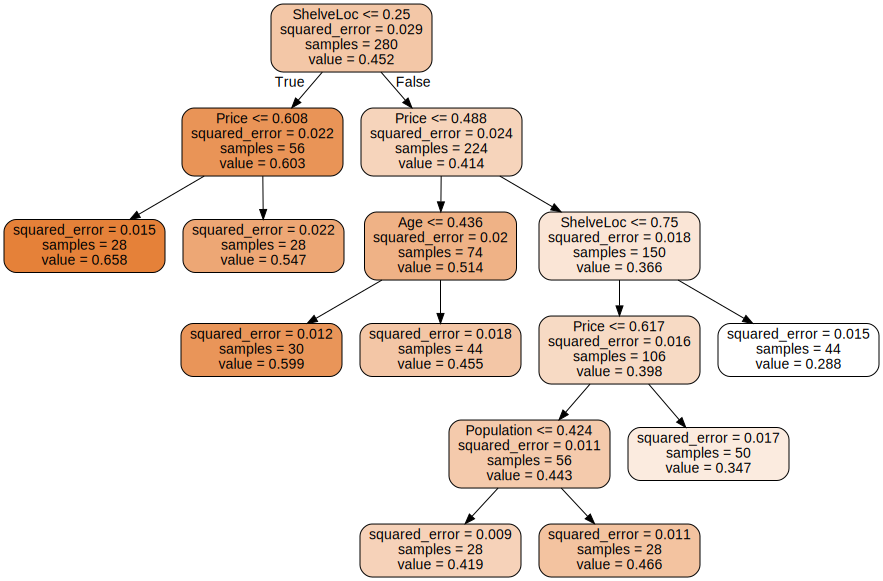

<Figure size 720x504 with 0 Axes>

In [51]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tuned_hyper_model, filled=True, rounded=True, feature_names=x.columns, out_file=None)
import graphviz
plt.figure(figsize = (10,7))
graphviz.Source(dot_data)

In [52]:
# prediction 
tuned_pred=tuned_hyper_model.predict(X_test)
tuned_pred

array([0.45518802, 0.28807901, 0.54708491, 0.28807901, 0.45518802,
       0.28807901, 0.65846431, 0.45518802, 0.65846431, 0.54708491,
       0.41939591, 0.45518802, 0.45518802, 0.46588814, 0.54708491,
       0.45518802, 0.54708491, 0.65846431, 0.41939591, 0.34725261,
       0.45518802, 0.34725261, 0.28807901, 0.46588814, 0.28807901,
       0.41939591, 0.41939591, 0.59926245, 0.34725261, 0.34725261,
       0.54708491, 0.65846431, 0.41939591, 0.28807901, 0.65846431,
       0.34725261, 0.28807901, 0.46588814, 0.65846431, 0.28807901,
       0.28807901, 0.34725261, 0.45518802, 0.65846431, 0.54708491,
       0.46588814, 0.45518802, 0.45518802, 0.34725261, 0.34725261,
       0.59926245, 0.59926245, 0.59926245, 0.65846431, 0.41939591,
       0.28807901, 0.46588814, 0.65846431, 0.65846431, 0.54708491,
       0.65846431, 0.65846431, 0.45518802, 0.34725261, 0.41939591,
       0.34725261, 0.65846431, 0.59926245, 0.28807901, 0.65846431,
       0.34725261, 0.34725261, 0.45518802, 0.28807901, 0.45518

In [54]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(tuned_hyper_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tuned_hyper_model.score(X_test, y_test)))

Training set score: 0.4766
Test set score: 0.4663


In [55]:
print('R^2_score:', metrics.r2_score(y_test,tuned_pred))

R^2_score: 0.4662967115014598


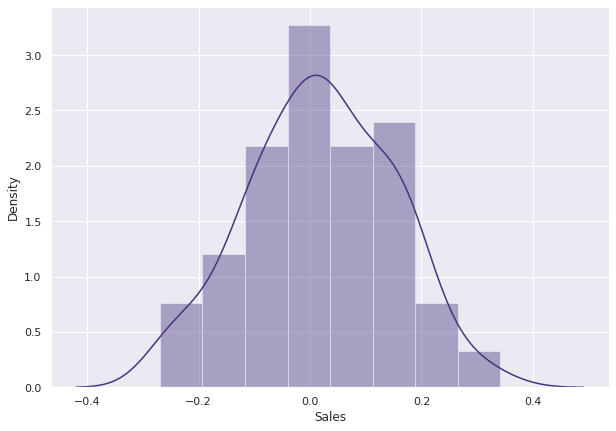

In [61]:
# checking difference between labled y and predicted y
plt.figure(figsize=(10,7))
sns.distplot(y_test-tuned_pred)

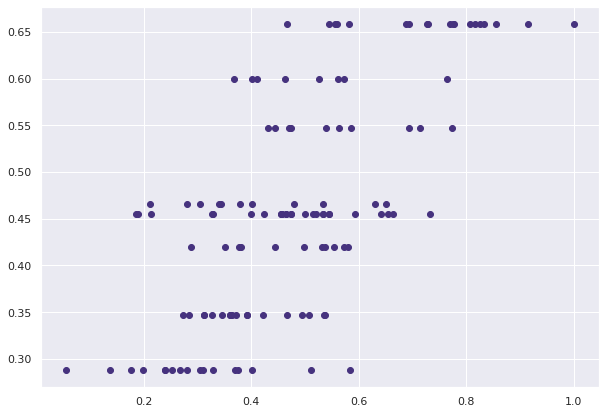

In [62]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,tuned_pred)

In [63]:
# With hyperparameter tuned 

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 0.1056799383775413
MSE: 0.017096540499220395
RMSE: 0.13075373990529066


In [64]:
# without hyperparameter tuning 

print('MAE:', metrics.mean_absolute_error(y_test,preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 0.10987631164376006
MSE: 0.018573010485951728
RMSE: 0.13628283268978425


In [65]:
df=pd.DataFrame({'Actual':y_test, 'Tuned_Predicted':tuned_pred , 'Predicted': preds})
df.head(5)

,Actual,Tuned_Predicted,Predicted
209,0.185618,0.455188,0.355475
280,0.175784,0.288079,0.303319
33,0.539029,0.547085,0.717791
210,0.267978,0.288079,0.285802
93,0.544561,0.455188,0.461051


## Cost Complexity Pruning(Improve model accuracy with Alpha Value):

In [69]:
model = DecisionTreeRegressor(random_state = 42,max_depth=5)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 1.19828834e-06, 1.02058009e-05, 1.07097161e-05,
       1.41831557e-05, 2.09177206e-05, 3.67010376e-05, 8.06318756e-05,
       1.23662836e-04, 1.46927008e-04, 1.50714815e-04, 1.51015851e-04,
       1.89491008e-04, 2.15655762e-04, 2.17820892e-04, 2.54218482e-04,
       3.46443397e-04, 3.71151362e-04, 3.99017199e-04, 5.69792948e-04,
       6.13596035e-04, 7.77219933e-04, 8.83500809e-04, 9.64976562e-04,
       1.32238519e-03, 1.33314320e-03, 1.60450141e-03, 3.88119516e-03,
       5.67582110e-03])

In [70]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha,max_depth=5)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.005675821097120698


<Figure size 720x504 with 0 Axes>

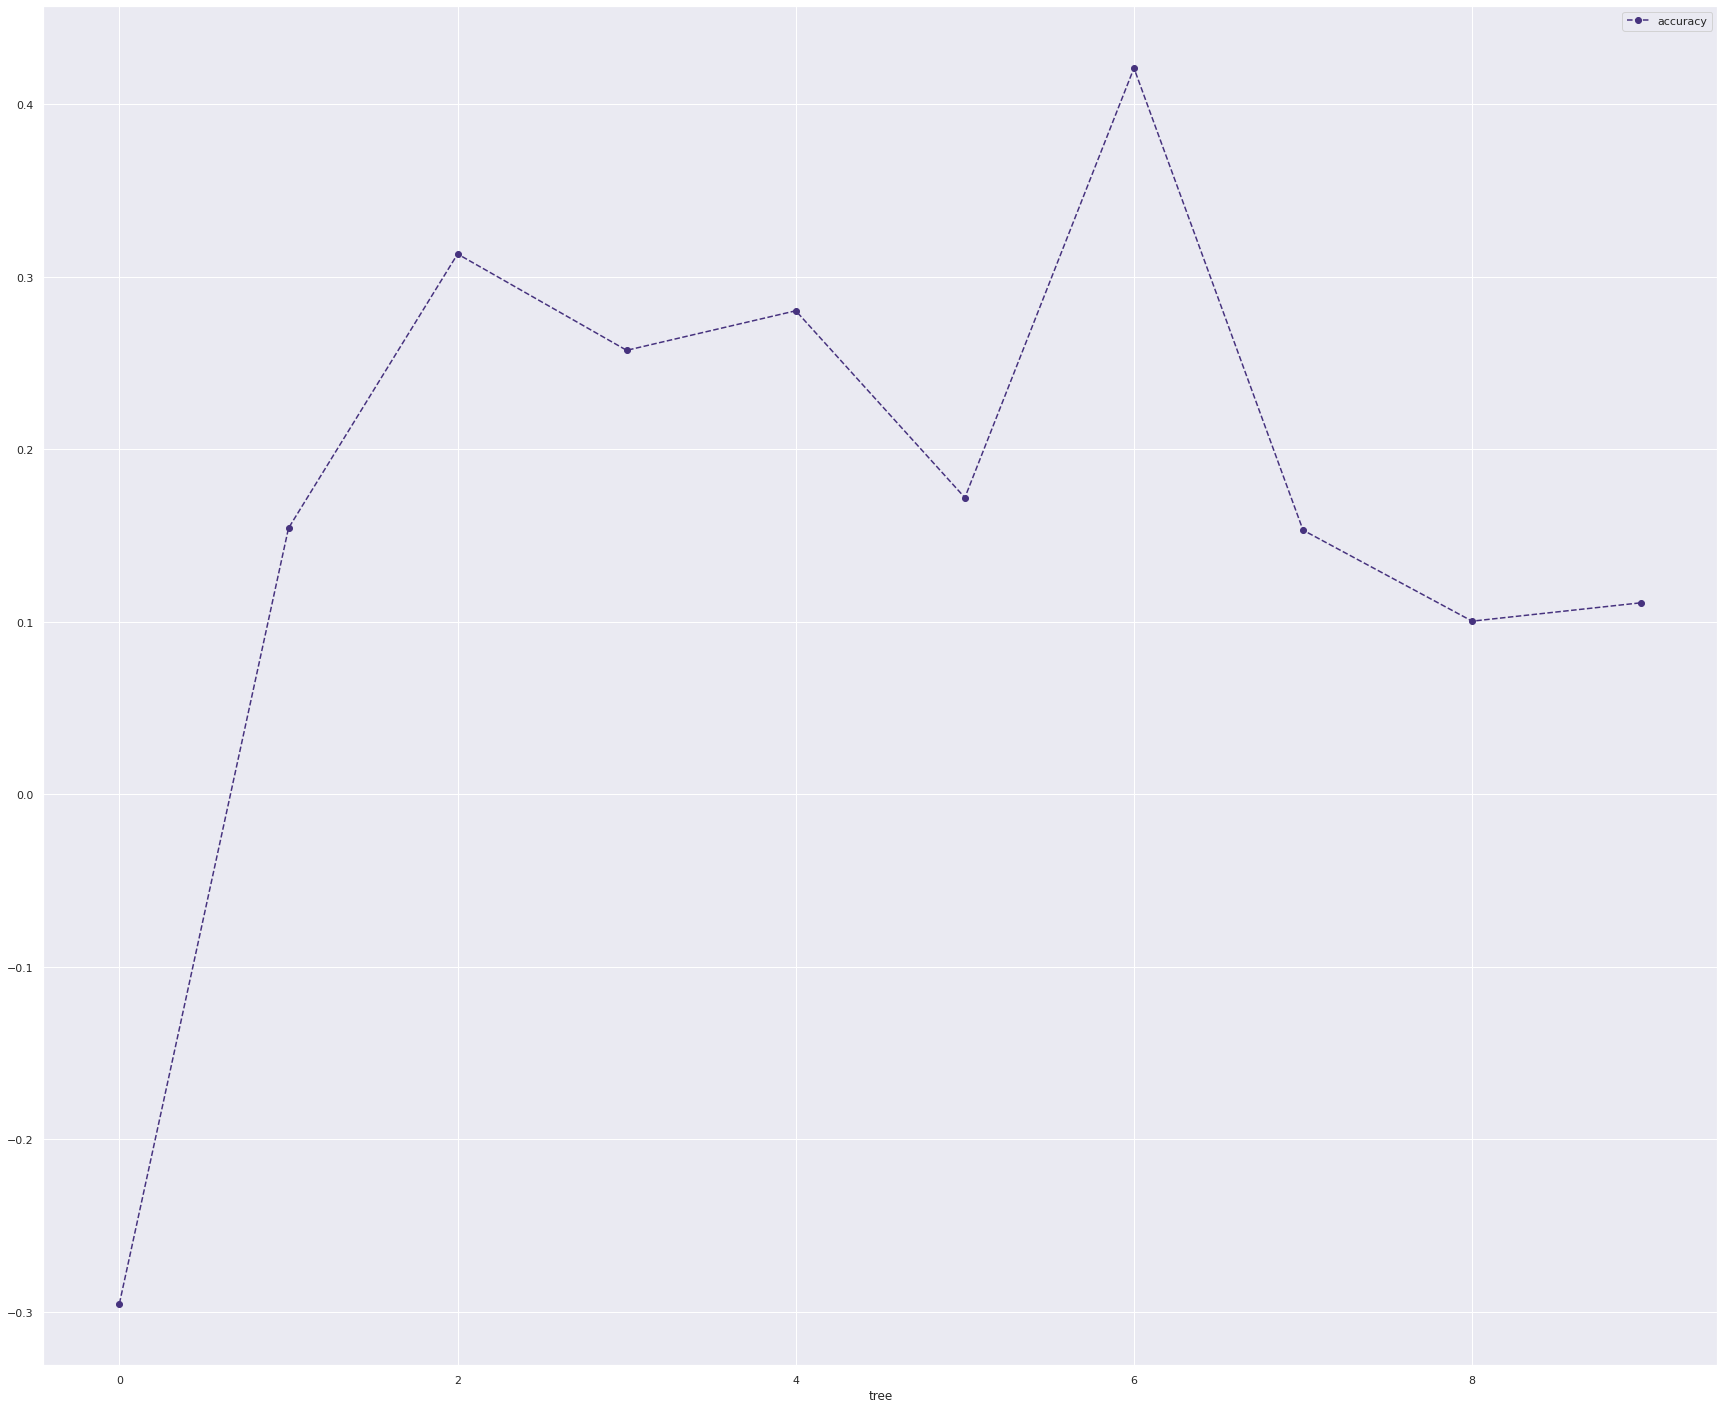

In [71]:
model=DecisionTreeRegressor(random_state = 42 ,ccp_alpha=0.005,max_depth=5)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True, random_state=10)
scores = cross_val_score(model, X_train, y_train, cv=cv)

df=pd.DataFrame(data={'tree':range(10),'accuracy': scores})
plt.figure(figsize=(10,7))
df.plot(x='tree',y='accuracy', marker='o',linestyle='--')
plt.show()

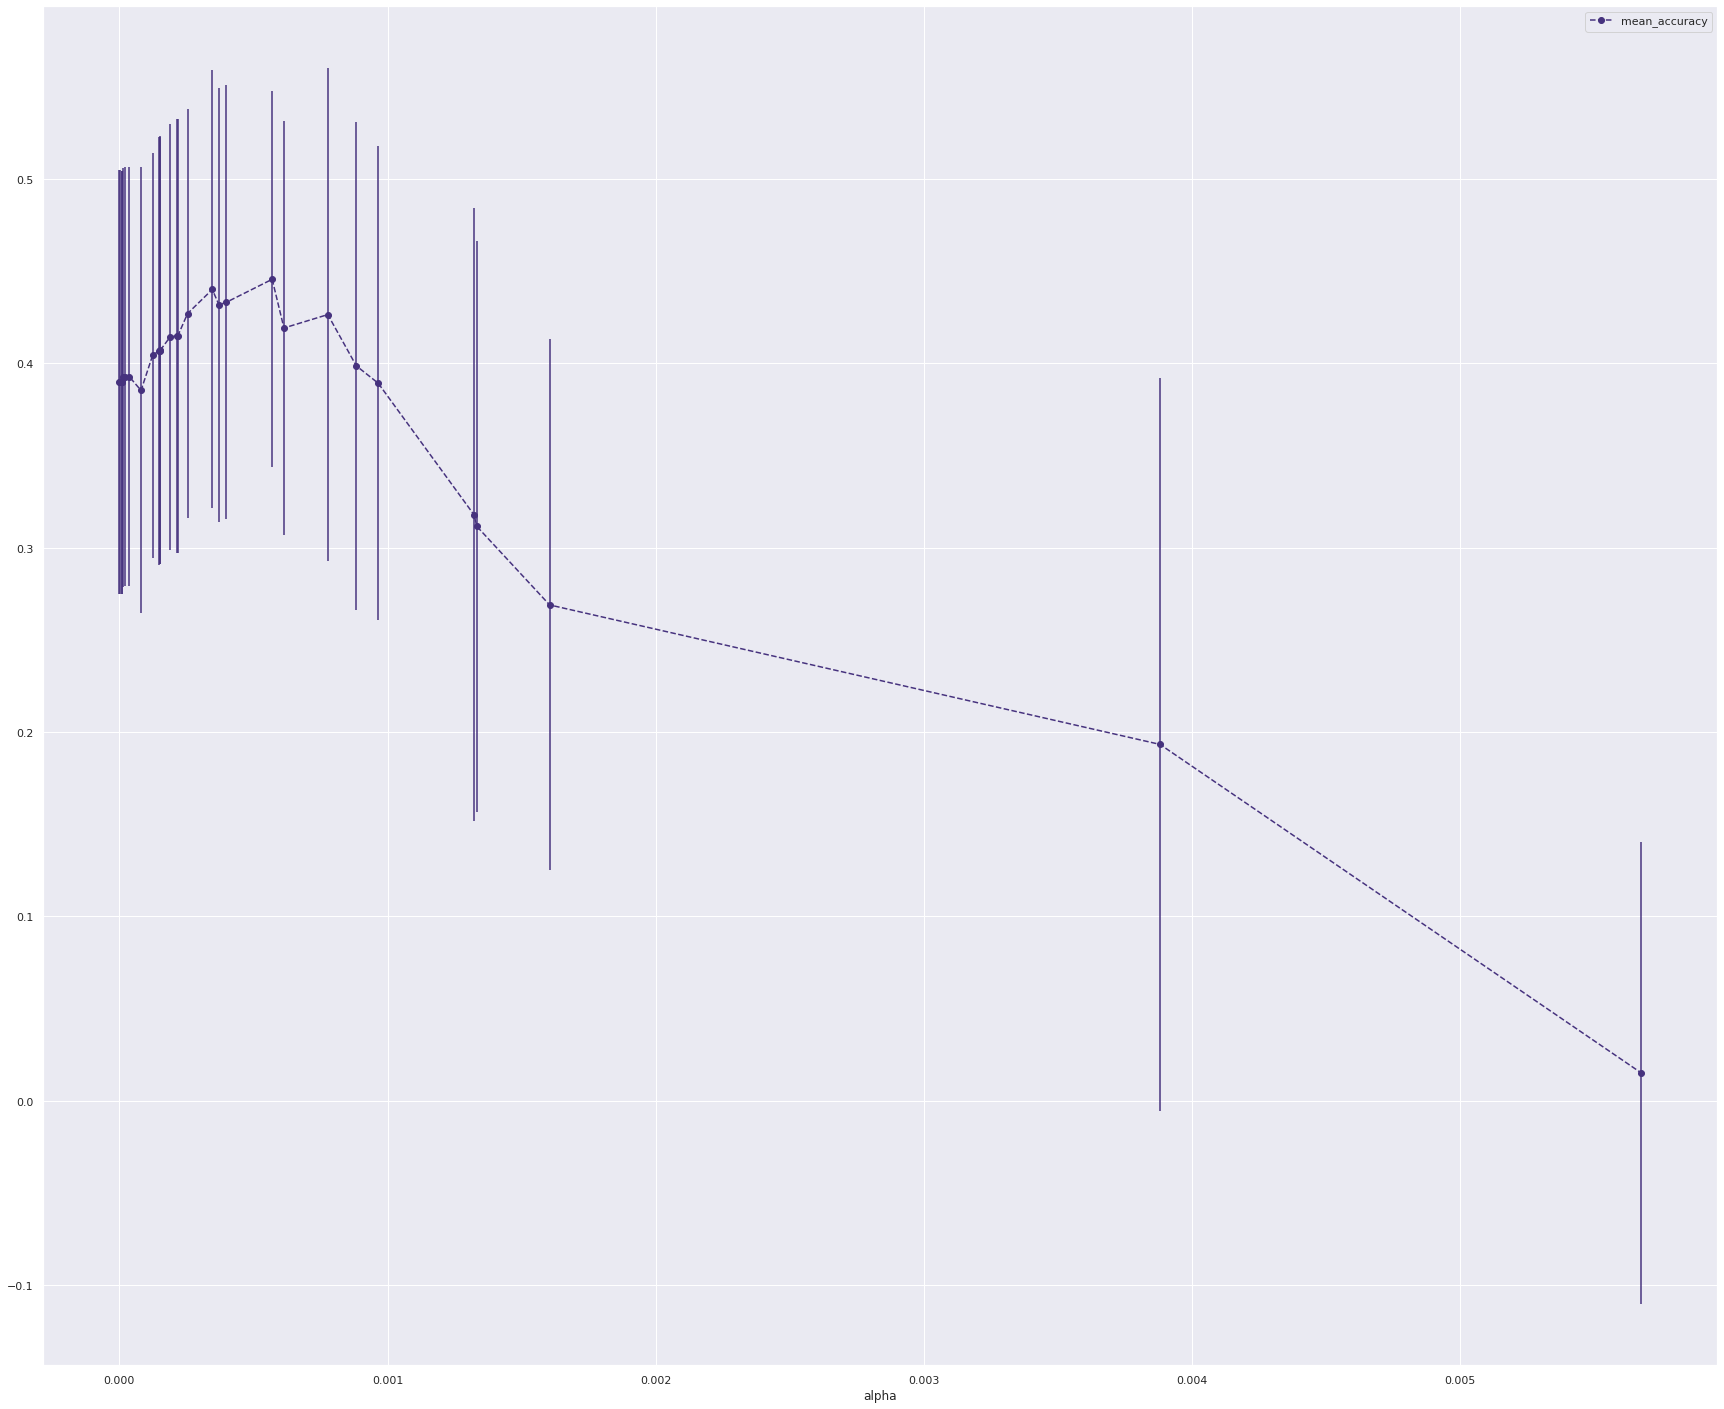

In [72]:
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
  model=DecisionTreeRegressor(random_state = 42,
                               ccp_alpha=ccp_alpha,max_depth=5)
  cv = KFold(n_splits=10, shuffle=True, random_state=10)
  scores = cross_val_score(model, X_train, y_train, cv=cv)
  alpha_loop_values.append([ccp_alpha, np.mean(scores),np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [73]:
alpha_results=alpha_results[(alpha_results['alpha']>0.000)
              &
              (alpha_results['alpha']<0.001)].sort_values(by=['mean_accuracy'], ascending=False).iloc[0:1,:]
alpha_results

,alpha,mean_accuracy,std
19,0.00057,0.445628,0.102042


In [74]:
ideal_ccp_alpha=alpha_results['alpha']
ideal_ccp_alpha

19    0.00057
Name: alpha, dtype: float64

In [75]:
ideal_ccp_alpha=float(ideal_ccp_alpha[0:])
ideal_ccp_alpha

0.0005697929481911118

In [76]:
pruned_model=DecisionTreeRegressor(ccp_alpha=ideal_ccp_alpha,
                                random_state = 42,max_depth=5)
pruned_model=pruned_model.fit(X_train,y_train)

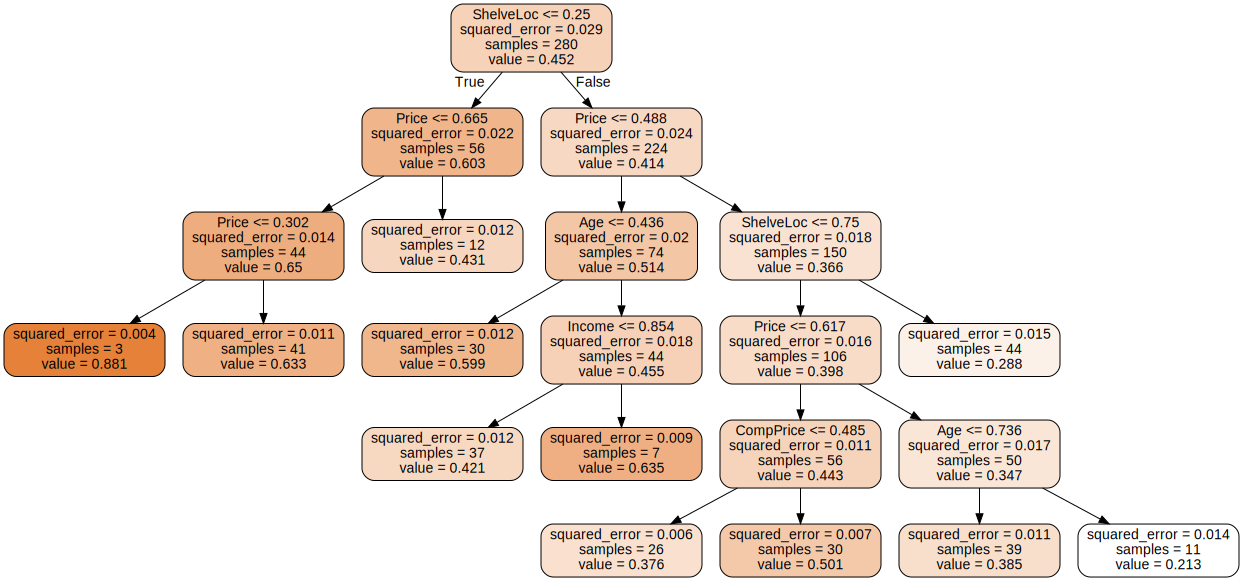

<Figure size 720x504 with 0 Axes>

In [77]:
dot_data = export_graphviz(pruned_model, filled=True, rounded=True, feature_names=x.columns, out_file=None)
plt.figure(figsize = (10,7))
graphviz.Source(dot_data)

In [78]:
#Predicting on test data
preds_pruned = pruned_model.predict(X_test) # predicting on test data set 
pd.Series(preds_pruned).value_counts()

0.421103    24
0.632647    22
0.288079    17
0.385135    15
0.500676    14
0.375680     8
0.599262     8
0.431264     5
0.212941     3
0.635350     2
0.880557     2
dtype: int64

In [79]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(pruned_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(pruned_model.score(X_test, y_test)))

Training set score: 0.6195
Test set score: 0.4290


In [80]:
from sklearn import metrics
print('R^2_score:', metrics.r2_score(y_test,preds_pruned))

R^2_score: 0.42902936511041356


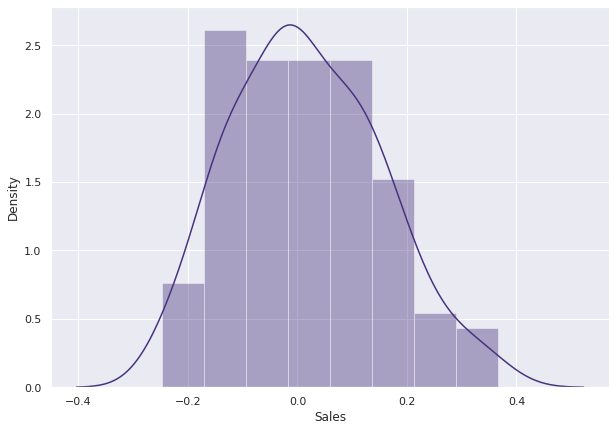

In [81]:
# checking difference between labled y and predicted y
plt.figure(figsize=(10,7))
sns.distplot(y_test-preds)

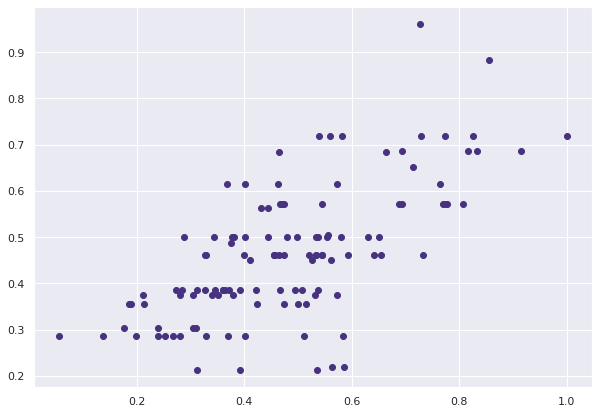

In [82]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,preds)

In [62]:
pruned_model.feature_importances_

array([0.08378063, 0.06252423, 0.01777139, 0.        , 0.35780492,
       0.37129566, 0.10682317, 0.        , 0.        , 0.        ])

In [83]:
FI = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': pruned_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
FI

,feature,importance
5,ShelveLoc,0.390693
4,Price,0.387835
6,Age,0.124359
1,Income,0.053790
0,CompPrice,0.043324
2,Advertising,0.000000
3,Population,0.000000
7,Education,0.000000
8,Urban,0.000000
9,US,0.000000


## Checking Prediction and Accuracy with 3 different Methods:

In [84]:
df1 = pd.DataFrame({'actual': y_test, 'Prediction_pruned': preds_pruned ,  'Tuned_Predicted':tuned_pred , 'Predicted': preds})
df1.head()

,actual,Prediction_pruned,Tuned_Predicted,Predicted
209,0.185618,0.421103,0.455188,0.355475
280,0.175784,0.288079,0.288079,0.303319
33,0.539029,0.632647,0.547085,0.717791
210,0.267978,0.288079,0.288079,0.285802
93,0.544561,0.421103,0.455188,0.461051


**R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.**

In [86]:
print('R^2_score:', metrics.r2_score(y_test,preds))
print('Hyper parameter tunning R^2_score:', metrics.r2_score(y_test,tuned_pred))
print('Prunning R^2_score:', metrics.r2_score(y_test,preds_pruned))

R^2_score: 0.42020569751393166
Hyper parameter tunning R^2_score: 0.4662967115014598
Prunning R^2_score: 0.42902936511041356


### Conclusion :

> By checking Three different method we came up with the conclusion that the performance of Prunning model is giving us a best score of residual sum of square which is nearer to 1 compare to other model.